# CUSUM test

> The upper and lower CUSUMs actually accumulate deviations from target that exceed a value called the reference value or allowance or slack value (normally indicated by K). K is typically set to be equal to half of the distance from the target and the shifted mean that we are interested in detecting quickly.
>
> Source: [What is a CUSUM Chart and When Should I Use One?](https://www.integral-concepts.com/wp-content/media/What-is-a-CUSUM-Chart-and-When-Should-I-Use-One.pdf)


> ## Tabular Method
>
> The Tabular method is an easier method than the V-Mask method. Here are the steps to make a CUSUM chart.
>
> - Step 1: First of all, estimate the standard deviation of the data from the **moving range control chart σ= R̅/d2**.
> - Step 2: Calculate the reference value or allowable slack since the CUSUM chart monitors the small shifts. Generally, 0.5 to 1 sigma will be considered. K= 0.5 σ.
> - Step 3: Compute decision interval H, generally ± 4 σ will be considered (some place ± 5 σ also be used).
> - Step 4: Calculate the upper and lower CUSUM values for each individual ith value.
>   - Upper CUSUM (UCi)= Max[0, UCi-1+xi – Target value-k).
>   - Lower CUSUM (LCi)= Min[0, LCi-1+xi – Target value+k).
> - Step 5: Draw all UCi & LCi values in the graph and also draw decision intervals (UCL and LCL).
> - Step 6: Check if any of the UCi values are above the UCL and any of the LCi values are below the LCL. Finally, take necessary action to eliminate the special causes if any of the points are out of control limits.
>
> Source: [Cumulative Sum Chart (CUSUM)](https://sixsigmastudyguide.com/cumulative-sum-chart-cusum/)


## Example

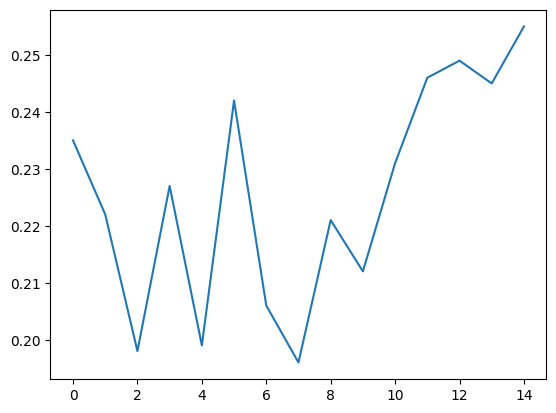

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

y = pd.Series([.235, .222, .198, .227, .199, .242, .206, .196, .221, .212, .231, .246, .249, .245, .255])
plt.plot(y, label='Data')

### Step 1: Estimating Standard Deviation

You can check control chart constants [here](http://web.mit.edu/2.810/www/files/readings/ControlChartConstantsAndFormulae.pdf).

In [ ]:
moving_range = y.diff().abs().mean()
d2 = 1.128
sigma = (moving_range/d2)
sigma

0.01697061803444782

### Steps 2 and 3: Computing Decision Interval H

In [ ]:
K = sigma * 0.5
UCL = sigma * 4
LCL = -sigma * 4
K, UCL, LCL

(0.00848530901722391, 0.06788247213779128, -0.06788247213779128)

### Step 4: Upper and Lower CUSUM values

In [ ]:
target_mean = .21

UC = [0]
LC = [0]
anomalies = []
for i, v in enumerate(y):
    UC.append(max(0, UC[-1]+v-target_mean-K))
    if UC[-1] > UCL:
        anomalies.append((i, v))
        print(i+1, v)
    LC.append(min(0, LC[-1]+v-target_mean+K))
    if LC[-1] < LCL:
        anomalies.append((i, v))
        print(i+1, v)

13 0.249
14 0.245
15 0.255


### Step 5: Draw

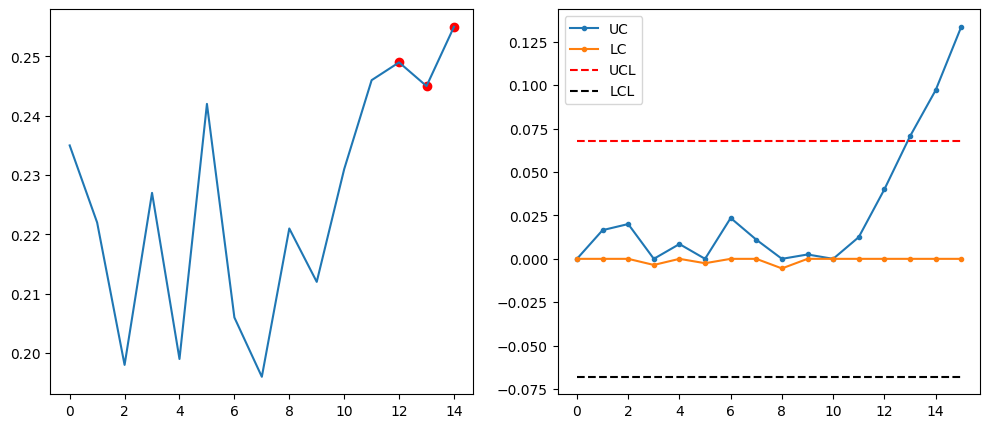

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(y.tolist())
for cx, cy in anomalies:
    axs[0].scatter(cx, cy, c='r')
axs[1].plot(UC, label='UC', marker='.')
axs[1].plot(LC, label='LC', marker='.')
axs[1].plot([UCL]*len(UC), linestyle='--', c='r', label='UCL')
axs[1].plot([LCL]*len(LC), linestyle='--', c='k', label='LCL')
axs[1].legend()

## Example with Expanding Window

In [ ]:
y = pd.Series([5.245, 5.372, 5.27,5.095, 5.023, 5.118, 5.162, 5.363, 5.204,  5.077, 5.278, 5.267,5.219, 5.165,
               5.052, 5.158, 5.22,  5.349, 5.263, 5.165, 5.175, 5.393, 5.423,5.217,  5.299, 5.362, 5.382, 5.389,
               5.115, 5.184,])

In [ ]:
import numpy as np

sigma_s = y.diff().abs().expanding(min_periods=2).mean()/d2
target_s = y.expanding().mean()
# target_s = np.ones_like(sigma_s)*5.2

UC = [0]
LC = [0]
UCL = [0]
LCL = [0]
anomalies = []
for i, (v, target_mean, sigma) in enumerate(zip(y, target_s, sigma_s)):
    K = sigma * 0.5
    UCL.append(sigma * 4)
    LCL.append(-sigma * 4)
    UC.append(max(0, UC[-1]+v-target_mean-K))
    if UC[-1] > UCL[-1]:
        print(i+1, v)
        anomalies.append((i, v))
    LC.append(min(0, LC[-1]+v-target_mean+K))
    if LC[-1] < LCL[-1]:
        print(i+1, v)
        anomalies.append((i, v))

27 5.382
28 5.389
29 5.115


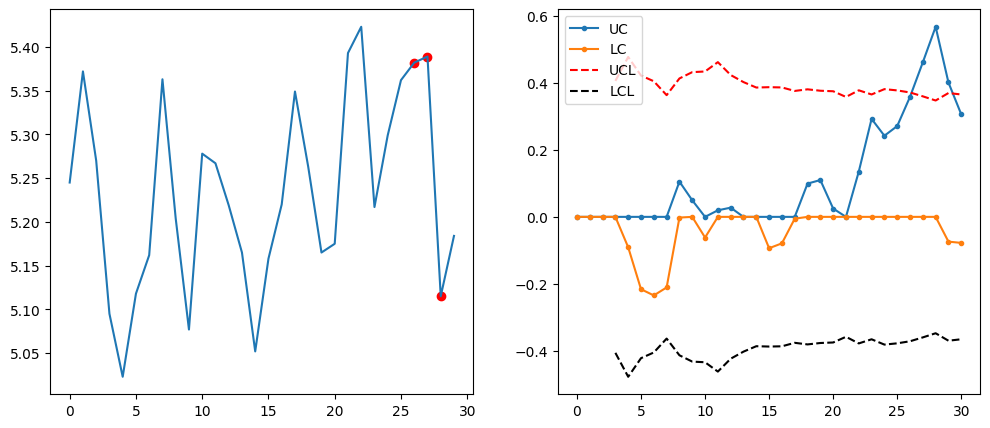

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(y.tolist())
for cx, cy in anomalies:
    axs[0].scatter(cx, cy, c='r')
axs[1].plot(UC, label='UC', marker='.')
axs[1].plot(LC, label='LC', marker='.')
axs[1].plot(UCL, linestyle='--', c='r', label='UCL')
axs[1].plot(LCL, linestyle='--', c='k', label='LCL')
axs[1].legend()

## Ruptures

https://centre-borelli.github.io/ruptures-docs/

## Reducing the influence of Covid-19 on time series forecasting models using skforecast

https://cienciadedatos.net/documentos/py45-weighted-time-series-forecasting